In [2]:
import osmnx
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import scipy
import scipy.sparse.linalg as sLA
import scipy.sparse as sp
from local_SE import *


In [26]:
# function for filtering nodes

def node_finder(nodes, edges, filter: list[bool], type = 'edges'):
    if type == 'edges':
        filtered_edges = edges[filter]
        u = filtered_edges.index.get_level_values('u')
        v = filtered_edges.index.get_level_values('v')
        osmids = np.concatenate((u.values, v.values))
        filtered_nodes = nodes[nodes.osmid.isin(osmids)]
        return filtered_nodes.index
    elif type == 'nodes':
        return nodes[filter].index

In [11]:
# function for getting eigenvalues as weights localise according to graoh distance

def local_eigenvalues_gd(A, z, local_strength, m=6):
    
    n = A.shape[0]
    G = nx.from_numpy_array(A)
    D = dict(nx.shortest_path_length(G))
    
    eigvals = np.zeros((len(local_strength), m))
    weights = np.zeros(n)
    weights[np.array(list(D[z].keys()))] = 1 / (np.array(list(D[z].values())) + 1)

    
    for j in range(len(local_strength)):
        W = scipy.sparse.diags( (weights**(local_strength[j]) / sum(weights**(local_strength[j])))**(1/2) )
        w, v = sLA.eigsh(W@A@W, m, which='LA')
        w = w[::-1]
        eigvals[j,:] = w
        
    return(eigvals)

In [50]:
def gd_weights(A, z):
    n = A.shape[0]
    G = nx.from_numpy_array(A)
    D = dict(nx.shortest_path_length(G))
    
    weights = np.zeros(n)
    weights[np.array(list(D[z].keys()))] = 1 / (np.array(list(D[z].values())) + 1)
    return weights

In [ ]:
place_name = "Bristol, UK"
graph = osmnx.graph_from_address(place_name, dist=1000)

In [4]:
nodes, edges = osmnx.graph_to_gdfs(graph)
nodes.reset_index(inplace=True)

In [5]:
adj = osmnx.graph_to_gdfs(graph, nodes=False, edges=True)
A = nx.adjacency_matrix(graph)

#change A from directed to undirected
A = A + A.T
A = A.sign()


In [6]:
A = sp.csr_matrix(A).astype('f')

In [7]:
A.shape

(4110, 4110)

In [36]:
def node_investigator(node_id):
    node_info = nodes.iloc[node_id]
    osmid = node_info.osmid
    print(node_info)
    print(edges.loc[osmid])

In [18]:
from shapely.geometry import LineString

In [24]:
gd_power = np.linspace(1,10,10)

z_nodes = [0, 200, 400, 600, 800, 1000]

#select 6 nodes at random
# z_nodes = np.random.choice(np.arange(len(nodes)), 6, replace=False)

eigs_1 = local_eigenvalues_gd(A, z_nodes[0], gd_power, m=10)
eigs_2 = local_eigenvalues_gd(A, z_nodes[1], gd_power, m=10)
eigs_3 = local_eigenvalues_gd(A, z_nodes[2], gd_power, m=10)
eigs_4 = local_eigenvalues_gd(A, z_nodes[3], gd_power, m=10)
eigs_5 = local_eigenvalues_gd(A, z_nodes[4], gd_power, m=10)
eigs_6 = local_eigenvalues_gd(A, z_nodes[5], gd_power, m=10)


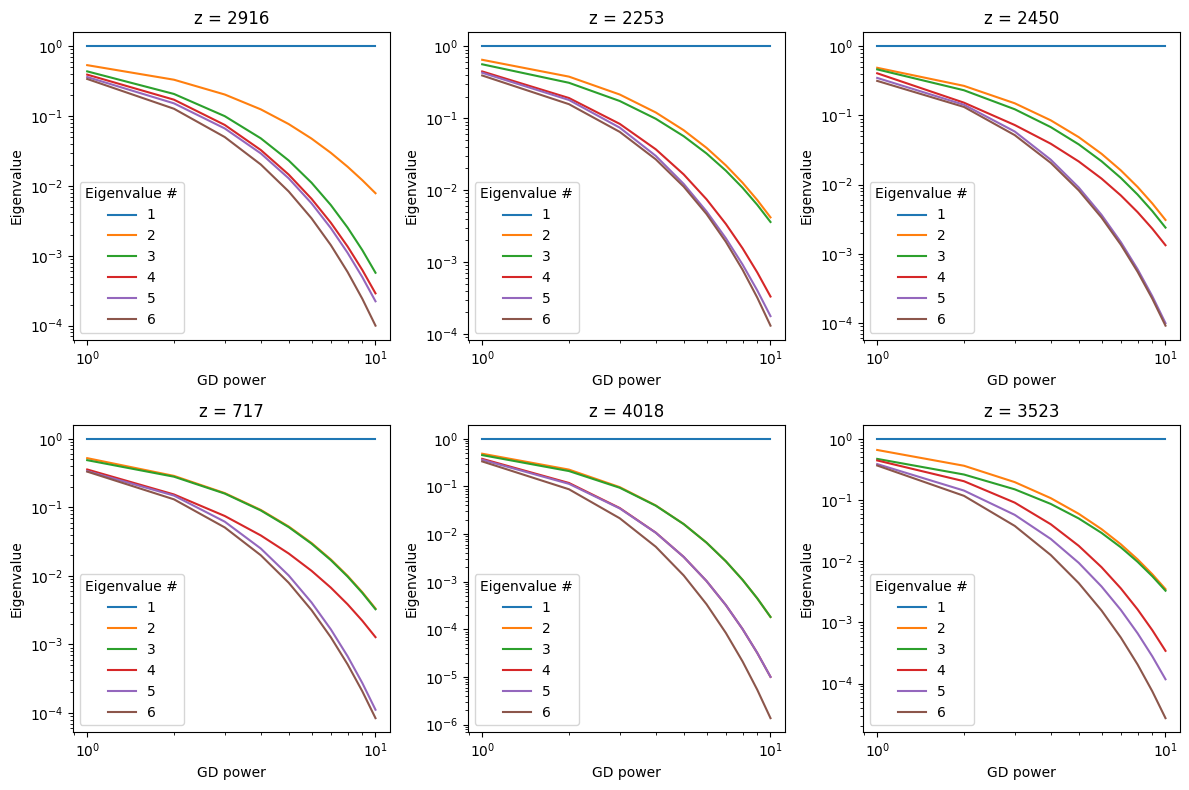

In [20]:
%matplotlib inline

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot 1: eigs_1
for i in range(6):
    axs[0, 0].plot(gd_power, eigs_1[:, i] / eigs_1[:, 0], label=i + 1)
axs[0, 0].set_title(r'z = {}'.format(z_nodes[0]))
axs[0, 0].set_xlabel('GD power')
axs[0, 0].set_ylabel('Eigenvalue')
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')
axs[0, 0].legend(title='Eigenvalue #')

# Plot 2: eigs_2
for i in range(6):
    axs[0, 1].plot(gd_power, eigs_2[:, i] / eigs_2[:, 0], label=i + 1)
axs[0, 1].set_title(r'z = {}'.format(z_nodes[1]))
axs[0, 1].set_xlabel('GD power')
axs[0, 1].set_ylabel('Eigenvalue')
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')
axs[0, 1].legend(title='Eigenvalue #')

# Plot 3: eigs_3
for i in range(6):
    axs[0, 2].plot(gd_power, eigs_3[:, i] / eigs_3[:, 0], label=i + 1)
axs[0, 2].set_title(r'z = {}'.format(z_nodes[2]))
axs[0, 2].set_xlabel('GD power')
axs[0, 2].set_ylabel('Eigenvalue')
axs[0, 2].set_xscale('log')
axs[0, 2].set_yscale('log')
axs[0, 2].legend(title='Eigenvalue #')

# Plot 4: eigs_4
for i in range(6):
    axs[1, 0].plot(gd_power, eigs_4[:, i] / eigs_4[:, 0], label=i + 1)
axs[1, 0].set_title(r'z = {}'.format(z_nodes[3]))
axs[1, 0].set_xlabel('GD power')
axs[1, 0].set_ylabel('Eigenvalue')
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].legend(title='Eigenvalue #')

# Plot 5: eigs_5
for i in range(6):
    axs[1, 1].plot(gd_power, eigs_5[:, i] / eigs_5[:, 0], label=i + 1)
axs[1, 1].set_title(r'z = {}'.format(z_nodes[4]))
axs[1, 1].set_xlabel('GD power')
axs[1, 1].set_ylabel('Eigenvalue')
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].legend(title='Eigenvalue #')

# Plot 6: eigs_6
for i in range(6):
    axs[1, 2].plot(gd_power, eigs_6[:, i] / eigs_6[:, 0], label=i + 1)
axs[1, 2].set_title(r'z = {}'.format(z_nodes[5]))
axs[1, 2].set_xlabel('GD power')
axs[1, 2].set_ylabel('Eigenvalue')
axs[1, 2].set_xscale('log')
axs[1, 2].set_yscale('log')
axs[1, 2].legend(title='Eigenvalue #')

plt.tight_layout()
plt.show()


In [33]:
step_ids = np.array(node_finder(nodes, edges, edges.highway == 'steps', type = 'edges'))
print(step_ids)
#investigated up to 477

[  63  126  135  140  141  216  217  219  247  254  409  413  417  446
  468  469  473  477  484  486  519  536  560  595  605  606  617  634
  637  654  677  682  697  698  704  709  710  722  723  724  725  737
  739  780  882  887  892  897  903  904  905  907  908  909  910  912
  913  914  915  916  934  987 1019 1020 1209 1386 1456 1461 1519 1530
 1532 1556 1815 1817 1843 1845 1916 1929 1931 1937 1938 1939 1940 1953
 1954 2028 2032 2033 2034 2045 2063 2064 2065 2070 2071 2095 2302 2303
 2448 2449 2450 2451 2453 2454 2465 2466 2512 2557 2558 2559 2560 2931
 3042 3043 3078 3079 3165 3166 3221 3223 3262 3264 3265 3290 3532 3668
 3723 3775 3791 3809 3810 3812 3862 3935 3936 4064 4078 4099 4100]


In [61]:
node_investigator(63)

osmid                                17486534
y                                   51.455264
x                                   -2.596497
street_count                                4
highway                              crossing
railway                                   NaN
geometry        POINT (-2.5964974 51.4552638)
Name: 63, dtype: object
                                               osmid  highway maxspeed  \
v          key                                                           
279763784  0                               191322145    steps      NaN   
1108314802 0                              1411783299  primary   20 mph   
9810031041 0    [1020599669, 1020856693, 1020856694]  footway      NaN   
5410116336 0                  [1411783299, 39020691]  primary   20 mph   

                          name  oneway       reversed     length  \
v          key                                                     
279763784  0         Zed Alley   False           True  49.370863   
11083

In [43]:
# Step nodes
gd_power = np.linspace(1,10,10)
z_nodes = [63, 254, 473] 

eigs_1 = local_eigenvalues_gd(A, z_nodes[0], gd_power, m=10)
eigs_2 = local_eigenvalues_gd(A, z_nodes[1], gd_power, m=10)
eigs_3 = local_eigenvalues_gd(A, z_nodes[2], gd_power, m=10)


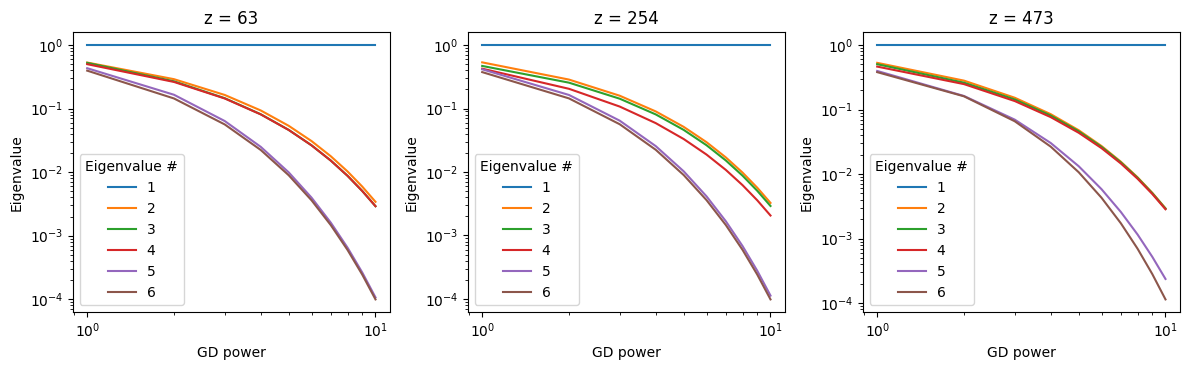

In [60]:
%matplotlib inline

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: eigs_1
for i in range(6):
    axs[0].plot(gd_power, eigs_1[:, i]/eigs_1[:,0], label=i + 1)
axs[0].set_title(r'z = {}'.format(z_nodes[0]))
axs[0].set_xlabel('GD power')
axs[0].set_ylabel('Eigenvalue')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend(title='Eigenvalue #', loc='lower left')

# Plot 2: eigs_2
for i in range(6):
    axs[1].plot(gd_power, eigs_2[:, i]/eigs_2[:,0], label=i + 1)
axs[1].set_title(r'z = {}'.format(z_nodes[1]))
axs[1].set_xlabel('GD power')
axs[1].set_ylabel('Eigenvalue')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend(title='Eigenvalue #', loc='lower left')

# Plot 3: eigs_3
for i in range(6):
    axs[2].plot(gd_power, eigs_3[:, i]/eigs_3[:,0], label=i + 1)
axs[2].set_title(r'z = {}'.format(z_nodes[2]))
axs[2].set_xlabel('GD power')
axs[2].set_ylabel('Eigenvalue')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].legend(title='Eigenvalue #', loc='lower left')

plt.tight_layout(rect=[0, 0, 1, 0.95])

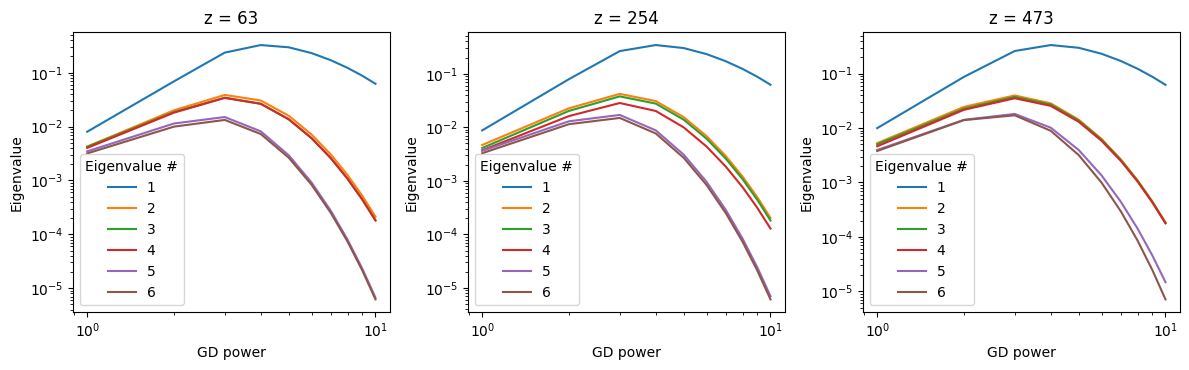

In [44]:
%matplotlib inline

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: eigs_1
for i in range(6):
    axs[0].plot(gd_power, eigs_1[:, i], label=i + 1)
axs[0].set_title(r'z = {}'.format(z_nodes[0]))
axs[0].set_xlabel('GD power')
axs[0].set_ylabel('Eigenvalue')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend(title='Eigenvalue #', loc='lower left')

# Plot 2: eigs_2
for i in range(6):
    axs[1].plot(gd_power, eigs_2[:, i], label=i + 1)
axs[1].set_title(r'z = {}'.format(z_nodes[1]))
axs[1].set_xlabel('GD power')
axs[1].set_ylabel('Eigenvalue')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend(title='Eigenvalue #', loc='lower left')

# Plot 3: eigs_3
for i in range(6):
    axs[2].plot(gd_power, eigs_3[:, i], label=i + 1)
axs[2].set_title(r'z = {}'.format(z_nodes[2]))
axs[2].set_xlabel('GD power')
axs[2].set_ylabel('Eigenvalue')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].legend(title='Eigenvalue #', loc='lower left')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [45]:
w, v = sLA.eigsh(A, 100, which='LA')
w = w[::-1]

W = gd_weights(A, 0)
W = scipy.sparse.diags(W)
eigvals, eigvecs = sLA.eigsh(W@A@W, 100, which='LA')
eigvals= eigvals[::-1]

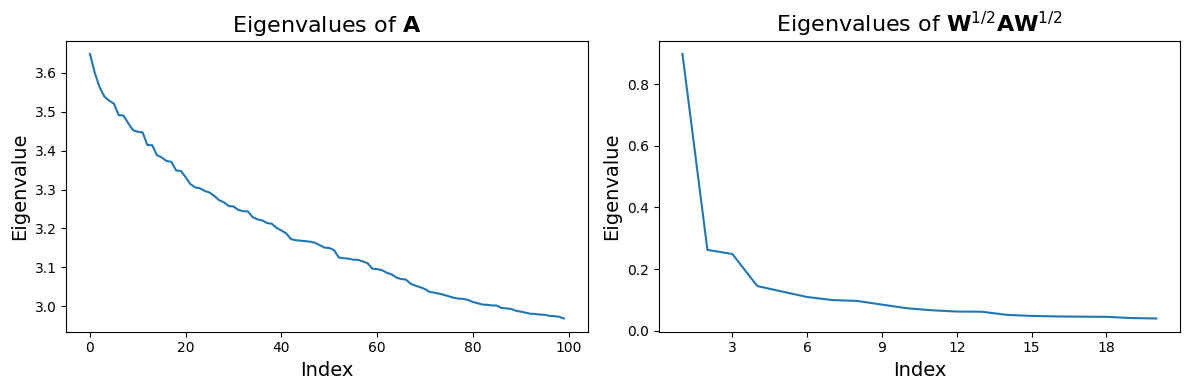

In [57]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the eigenvalues of A
axs[0].plot(w[0:100])
axs[0].set_xlabel('Index', fontsize=14)
axs[0].set_ylabel('Eigenvalue', fontsize=14)
axs[0].set_title(r'Eigenvalues of $\mathbf{A}$', fontsize=16)

# Plot the first row of eigvals with integer indices
axs[1].plot(range(1, 21), eigvals[0:20])
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].set_xlabel('Index', fontsize=14)
axs[1].set_ylabel('Eigenvalue', fontsize=14)
axs[1].set_title(r'Eigenvalues of $\mathbf{W}^{1/2} \mathbf{A} \mathbf{W}^{1/2}$', fontsize=16)

plt.tight_layout()
plt.show()
